# Plotting Sigmoid Function

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [3]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [4]:
sigmoid(1, 0.5, 0)

np.float64(0.6224593312018546)

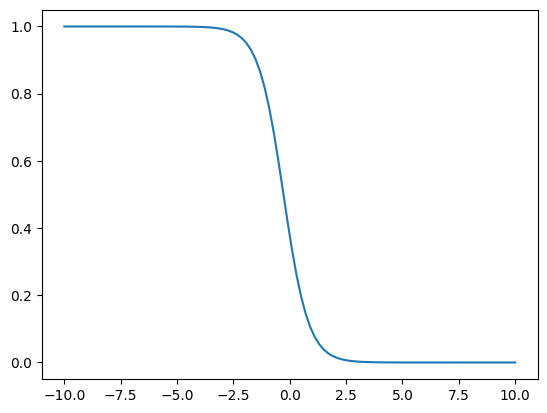

In [5]:
w = -1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -0.5  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [6]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [7]:
sigmoid_2d(1, 0, 0.5, 0, 0)

np.float64(0.6224593312018546)

In [8]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [9]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [10]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

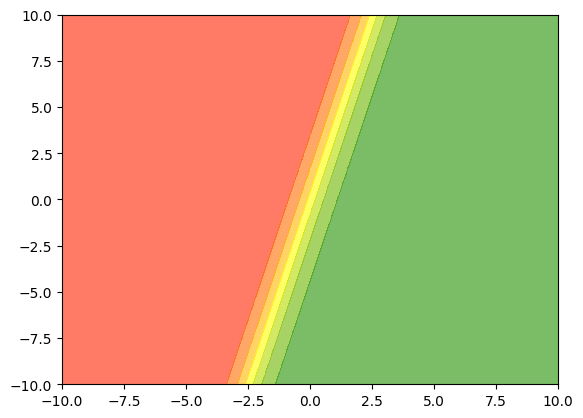

In [11]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

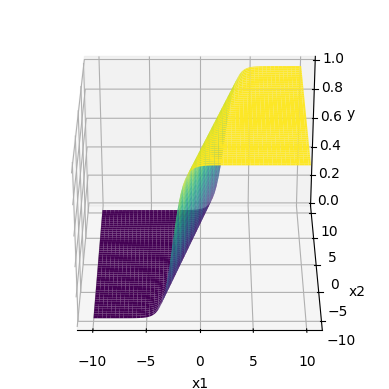

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [13]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

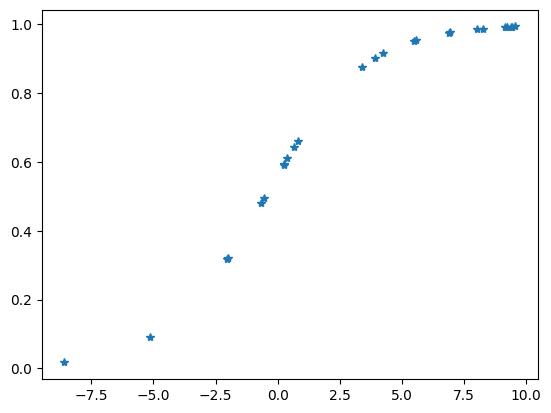

In [14]:
plt.plot(X, Y, '*')
plt.show()

In [15]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [16]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [17]:
WW.shape

(101, 101)

In [18]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

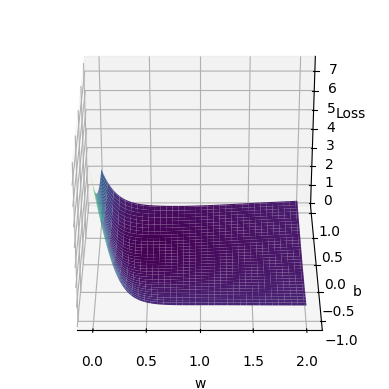

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [20]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [21]:
print(i, j)

63 25


In [22]:
print(WW[i, j], BB[i, j])

0.5 0.26


# Class for Sigmoid Neuron

In [23]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Fit for toy data

In [24]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [25]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

/tmp/ipykernel_80263/4211609544.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/1 [00:00<?, ?epoch/s]

In [26]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

/tmp/ipykernel_80263/4211609544.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/1 [00:00<?, ?epoch/s]

/tmp/ipykernel_80263/1446177394.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  YY[i, j] = sn.sigmoid(sn.perceptron(val))


[[ 1.60505756 -1.12107181]] [-0.00390406]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.78961361 -0.80352986]] [-0.05045326]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.8886761  -0.62503478]] [-0.09886794]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.90645198 -0.6439409 ]] [-0.1312228]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.92716526 -0.64976666]] [-0.16126312]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.94649007 -0.65594569]] [-0.18945527]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.96478779 -0.66179188]] [-0.2159822]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.98215775 -0.66734142]] [-0.2410094]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.99868735 -0.67262197]] [-0.26468028]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.01445276 -0.67765758]] [-0.2871198]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.02952068 -0.68246936]] [-0.30843731]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.04394977 -0.68707594]] [-0.328729]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.05779185 -0.69149382]] [-0.34807979]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.07109287 -0.69573764]] [-0.36656499]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.08389376 -0.69982049]] [-0.38425162]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.09623109 -0.70375408]] [-0.40119957]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.10813768 -0.70754891]] [-0.41746254]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.11964305 -0.71121447]] [-0.4330888]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.13077385 -0.71475932]] [-0.44812193]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.14155423 -0.71819123]] [-0.46260136]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.15200609 -0.72151725]] [-0.47656286]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.1621494  -0.72474382]] [-0.490039]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.17200238 -0.7278768 ]] [-0.50305948]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.18158169 -0.73092159]] [-0.51565145]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.19090264 -0.73388311]] [-0.52783981]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.19997929 -0.73676591]] [-0.53964743]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.20882458 -0.73957419]] [-0.55109535]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.21745047 -0.74231179]] [-0.56220298]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.22586803 -0.74498231]] [-0.57298827]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 2.23408751 -0.74758905]] [-0.58346783]


  0%|          | 0/1 [00:00<?, ?epoch/s]

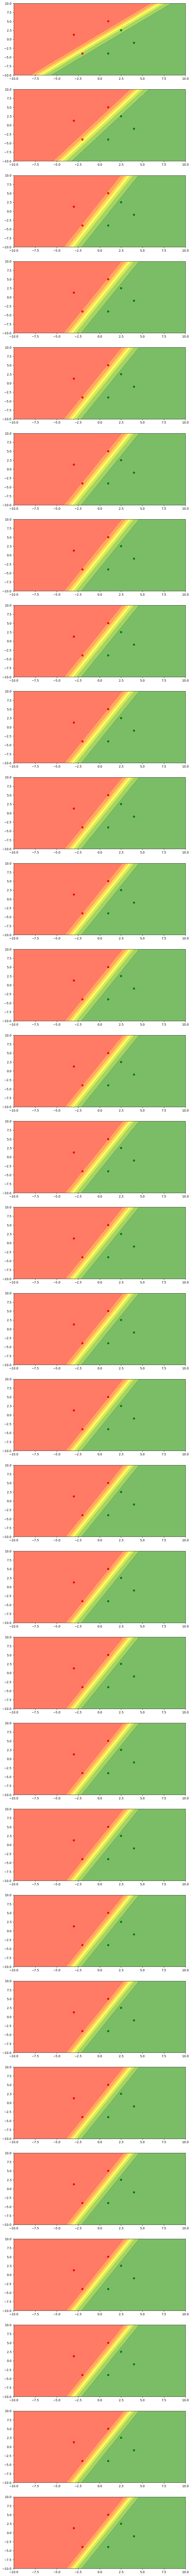

In [27]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

# Load Data

In [28]:
!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

--2024-08-10 17:15:47--  https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6031:18::a27d:5112, 162.125.81.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6031:18::a27d:5112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/aar0b1ls36hokmp727rnz/mobile_cleaned.csv?rlkey=yrcbserv7rcusgh4imorigahb [following]
--2024-08-10 17:15:47--  https://www.dropbox.com/scl/fi/aar0b1ls36hokmp727rnz/mobile_cleaned.csv?rlkey=yrcbserv7rcusgh4imorigahb
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘mobile_cleaned.csv’

mobile_cleaned.csv      [  <=>               ] 172.25K   464KB/s    in 0.4s    

2024-08-10 17:15:48 (464 KB/s) - ‘mobile_cleaned.csv’ saved [176383]



In [29]:
!ls

0225_SigmoidNeuron-1551169534921.ipynb	Readme.md
0228_SigmoidNeuron-1551253091703.ipynb	sigmoid_demo1.gif
mobile_cleaned-1551253091700.csv	visualize_sigmoid.py
mobile_cleaned.csv


In [32]:
data = pd.read_csv('./mobile_cleaned-1551253091700.csv')

In [33]:
data.head()

PhoneId  Pixel Density  Screen Size  Weight  RAM  Processor_frequency  \
0        0            403         6.26     182    4                  1.8   
1        1            271         6.20     168    3                  1.8   
2        2            409         6.30     168    3                  2.1   
3        4            411         6.00     169    4                  2.2   
4        5            396         6.50     175    4                  2.2   

   Screen to Body Ratio (calculated)  Height  Internal Memory  Capacity  ...  \
0                              80.68   157.9               64      4000  ...   
1                              80.85   156.2               32      4230  ...   
2                              83.68   157.0               32      3500  ...   
3                              74.78   159.8               64      3300  ...   
4                              84.23   160.4               64      3750  ...   

   os_name_Tizen  os_name_iOS  SIM Slot(s)_Dual SIM, GSM+CDMA  \
0              0            0                               0   
1              0            0                               0   
2              0            0                               0   
3              0            0                               0   
4              0            0                               0   

   SIM Slot(s)_Dual SIM, GSM+GSM  SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE  \
0                              0                                          1   
1                              0                                          1   
2                              0                                          1   
3                              1                                          0   
4                              0                                          1   

   SIM Slot(s)_Single SIM, GSM  Sim1_2G  Sim1_3G  Sim1_4G  Rating  
0                            0        0        0        1     4.5  
1                            0        0        0        1     4.5  
2                            0        0        0        1     4.4  
3                            0        0        0        1     4.3  
4                            0        0        0        1     4.4  

[5 rows x 88 columns]

In [34]:
data.shape

(341, 88)

In [35]:
X = data.drop('Rating', axis=1)

In [36]:
Y = data['Rating'].values

In [37]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [39]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(int)

In [40]:
data['Class'].value_counts(normalize=True)

Class
0    0.533724
1    0.466276
Name: proportion, dtype: float64

In [41]:
Y_binarised = data['Class'].values

## Standardisation

In [42]:
R = np.random.random([100, 1])

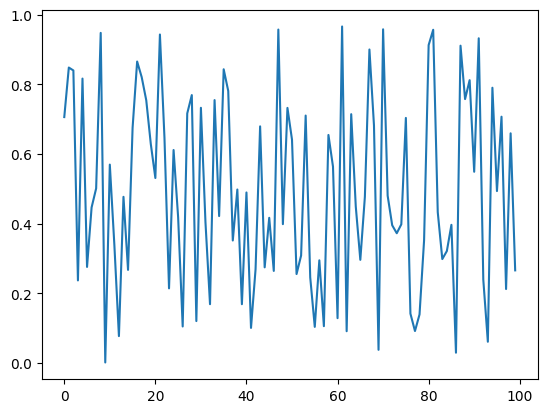

In [43]:
plt.plot(R)
plt.show()

In [44]:
np.mean(R)

np.float64(0.49283380630506424)

In [45]:
np.std(R)

np.float64(0.27615707737732503)

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(R)

StandardScaler()

In [48]:
scaler.mean_

array([0.49283381])

In [49]:
RT = scaler.transform(R)

In [50]:
np.mean(RT)

np.float64(-3.6637359812630164e-16)

In [51]:
np.std(RT)

np.float64(1.0)

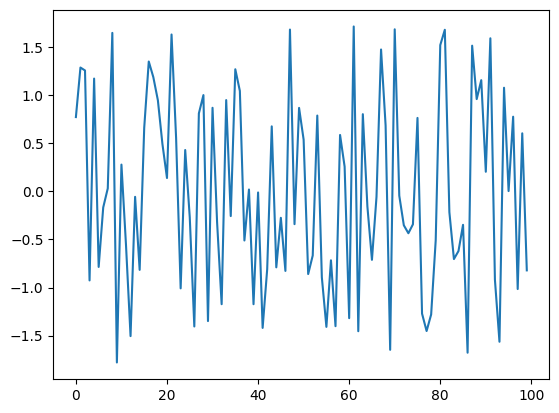

In [52]:
plt.plot(RT)
plt.show()

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised)

In [54]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [55]:
scaler = StandardScaler()

In [56]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [57]:
minmax_scaler = MinMaxScaler()

In [58]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [59]:
np.min(Y_scaled_train)

np.float64(0.0)

In [60]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [61]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [62]:
scaled_threshold

np.float64(0.6800000000000002)

In [63]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()

In [64]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

# Train on Real Data

In [65]:
sn = SigmoidNeuron()

/tmp/ipykernel_80263/4211609544.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/2000 [00:00<?, ?epoch/s]

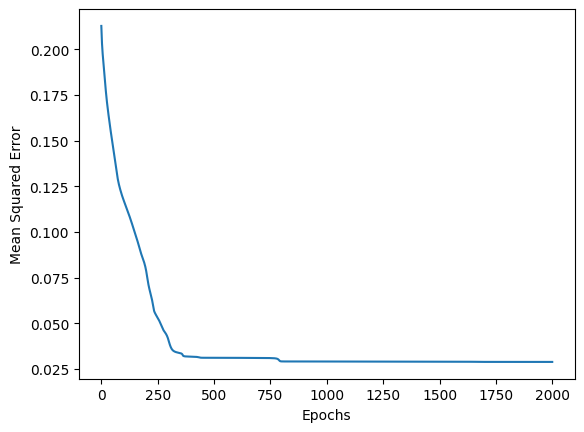

In [66]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015, display_loss=True)

In [67]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [68]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [69]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [70]:
print(accuracy_train, accuracy_test)

0.8274509803921568 0.813953488372093
